In [ ]:
# Cell 1: Random Forest Classifier on Iris dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

print("Random Forest on Iris Dataset")
print("-----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n", feat_imp)


Random Forest on Iris Dataset
-----------------------------
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Feature Importances:
              Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


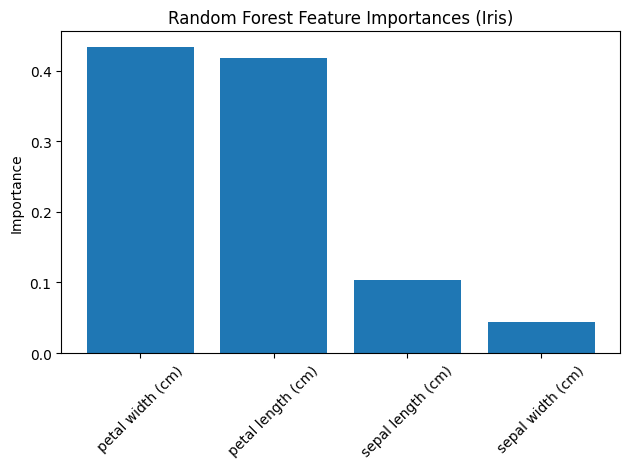

In [ ]:
# Cell 2: Plot feature importances

import matplotlib.pyplot as plt

plt.figure()
plt.bar(feat_imp["Feature"], feat_imp["Importance"])
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances (Iris)")
plt.tight_layout()
plt.show()
